In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_dir = r'temp_data'
data_list = os.listdir(data_dir)

long_df = pd.DataFrame(columns = ['ndates', 'TMAX', 'TMIN', 'STATION_NAME', 'DATE'])
for df in data_list:
    dfi = pd.read_csv(os.path.join(data_dir, df))
    dfi['ndates'] = ['2000' + date.astype(str)[4:] for date in dfi.DATE]
    
    long_df = pd.concat([long_df,
                         dfi[['ndates', 'TMAX', 'TMIN', 'STATION_NAME', 'DATE']]],
                        axis=0)
# clean up missing values
drop = (long_df.TMAX < -1000) | (long_df.TMIN < -1000 )
long_df = long_df[~drop]
#long_df['ndates'] = pd.to_datetime(long_df.ndates, format='%Y%m%d')
#long_df.DATE = pd.to_datetime(long_df.DATE, format='%Y%m%d')

In [3]:
d = np.array(list((set(long_df.ndates))))
start = np.where(d == '20000901')[0][0]
start

356

In [5]:
s = pd.to_datetime(long_df.DATE, format='%Y%m%d')
ts = s.dt.strftime('%Y%m%d')
#tdelta = ts - datetime.strptime(str(ts.year),  "%Y")

In [6]:
m_cat = long_df.ndates.astype('category')
long_df['code'] = m_cat.cat.codes
sept1st = np.where(long_df.ndates == '20000921')[0][0]
long_df.code.iloc[sept1st]

264

In [7]:
recode = np.zeros(len(long_df))
for i in range(len(long_df.code)):
    obj = long_df.code.iloc[i]
    code = (obj - 264).astype(float)
    if code < 0:
        recode[i] = 366 + code
    else:
        recode[i] = code
   
long_df['recode'] =  recode

In [8]:
stations = list(set(long_df.STATION_NAME))
selector = [None] * 5
for i, name in enumerate(stations):
    selector[i] = long_df.STATION_NAME == name
stations

['PITTSBURGH ASOS PA US',
 'MIAMI WEATHER SERVICE OFFICE CITY FL US',
 'NATIONAL ARBORETUM DC DC US',
 'CHICAGO MIDWAY AIRPORT IL US',
 'INDIANAPOLIS INTERNATIONAL AIRPORT IN US']

In [9]:
born = long_df.DATE == 19750122
won = long_df.DATE == 19880714

bc =long_df [['TMAX', 'TMIN', 'recode']][born].values
wc = long_df [['TMAX', 'TMIN', 'recode']][won].values
wc.shape
bc

array([[35, 28, 123.0]], dtype=object)

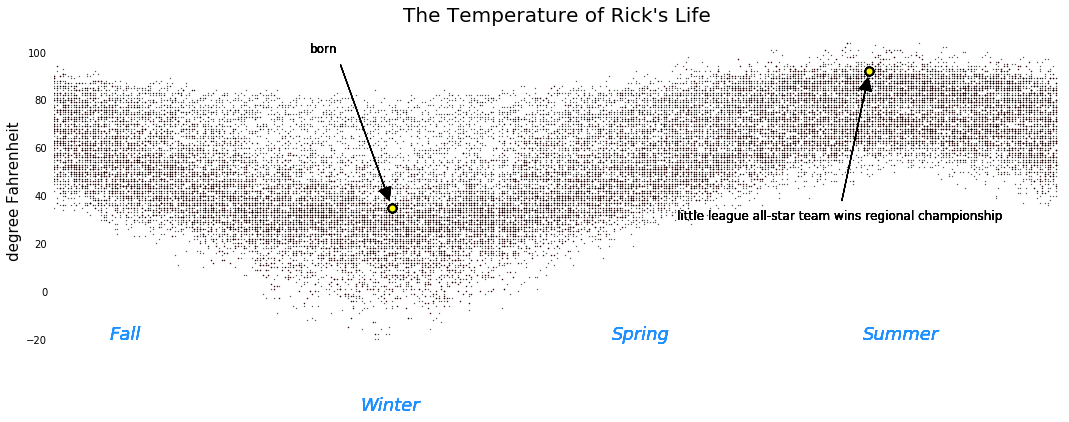

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x = np.arange(366)
fig, ax = plt.subplots(figsize=(18,6))
for i in range(len(stations)):
    subset = selector[i]
    dates = long_df.recode[subset]
    low = long_df.TMIN[subset]
    high = long_df.TMAX[subset]
    if stations[i] == 'CHICAGO MIDWAY AIRPORT IL US':
        ax.plot(dates, low, 'o', mfc='maroon', mec='maroon', ms=0.4)
        ax.plot(dates, high, 'o', mfc='maroon',mec='maroon', ms=0.4)
        
    ax.plot(dates, low, 'o', mfc='k', mec='k', ms=0.3)
    ax.plot(dates, high, 'o', mfc='k',mec='k', ms=0.3)
    
    ax.plot(bc[0,2], bc[0,0], 'o', mfc='yellow', mec='k', ms=8, mew=2)
    #ax.annotate('born',
    #        xy=(bc[0,2], bc[0,0]), xycoords='born')

    ax.annotate('born', fontsize=12, xy=(bc[0,2], bc[0,0]), xytext=(bc[0,2]-30, 100),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.1),
            )
    
    ax.plot(wc[0,2], wc[0,0], 'o', mfc='yellow', mec='k', ms=8, mew=2)
    #ax.annotate('born',
    #        xy=(bc[0,2], bc[0,0]), xycoords='born')

    ax.annotate('little league all-star team wins regional championship', fontsize=12,
                xy=(wc[0,2], wc[0,0]), xytext=(wc[0,2]-70, 30),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.1),
            )
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(0, 366)
    ax.get_xaxis().set_visible(False)
    ax.set_ylabel('degree Fahrenheit', fontsize=15)
    ax.tick_params(top='off', bottom='off', left='off', 
                   right='off', labelleft='on', labelbottom='on')
    
    ax.text(20, -20, 'Fall', style='italic', color='dodgerblue', fontsize=18)
    ax.text(111.5, -50, 'Winter', style='italic', color='dodgerblue', fontsize=18)
    ax.text(203, -20, 'Spring', style='italic', color='dodgerblue', fontsize=18)
    ax.text(294.5, -20, 'Summer', style='italic', color='dodgerblue', fontsize=18)
plt.title("The Temperature of Rick's Life", fontsize=20)
plt.show()